<h1>Chapter01 程序与导函数<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [24]:
!conda install -n jaxenv ipykernel --update-deps --force-reinstall

Solving environment: \ Solving environment: / \ / done
done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/andy/anaconda3/envs/jaxenv

  added / updated specs:
    - _libgcc_mutex
    - _openmp_mutex
    - asttokens
    - backcall
    - ca-certificates
    - certifi
    - comm
    - debugpy
    - decorator
    - entrypoints
    - executing
    - ipykernel
    - ipython
    - jedi
    - jupyter_client
    - jupyter_core
    - ld_impl_linux-64
    - libffi
    - libgcc-ng
    - libgomp
    - libsodium
    - libstdcxx-ng
    - matplotlib-inline
    - ncurses
    - nest-asyncio
    - openssl
    - packaging
    - parso
    - pexpect
    - pickleshare
    - pip
    - platformdirs
    - prompt-toolkit
    - psutil
    - ptyprocess
    - pure_eval
    - pygments
    - python-dateutil
    - python=3.9
    - py

# 1.1 手动求导示例

In [ ]:

''' manual differentiation'''
from math import sin, cos

def f(x):
    return sin(x)

def f_prime(x):
    return cos(x)

In [ ]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))
y = x + x.T

# visualize the high level Dask graph
y.dask.visualize(filename='transpose-hlg.svg')

ModuleNotFoundError: No module named 'dask'

In [ ]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))
y = x + x.T
z = y + 1
z.dask

HighLevelGraph with 4 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f7f667c07c0>
 0. ones_like-181ea22e9ceab129f64af440ce8e6fb9
 1. transpose-9ed3c5fd42645064daa14d2addf7bc16
 2. add-d0438ea726c9eb1a3d29831a733cdf9a
 3. add-aadbc260a045dac422b734d6cf48f20b

In [ ]:
import dask.array as da
x = da(123)
y = x + u

y.dask

# 1.2 数值微分之中的精度问题

## 库的导入

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install jax
!pip install torch


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [2]:
def f(x):
    return x ** 0.5

def err(h, x, fcn: Callable, fcn_prime:Callable):
    return (fcn(x+h) - fcn(x)) / h - fcn_prime(x)

In [3]:
pow = 16
h_list = np.logspace(-pow-1, -1, pow*3+1).tolist()

## 公式
- <font color=white size=4 face=雅黑>x轴：</font> 
$$log_{10}(h)$$
- <font color=white size=4 face=雅黑>y轴：</font> 
$$log_{10}(|\frac{f(x_{0}+h)-f(x_0)}{h} - f^{'}(x_0)|)$$


## math库

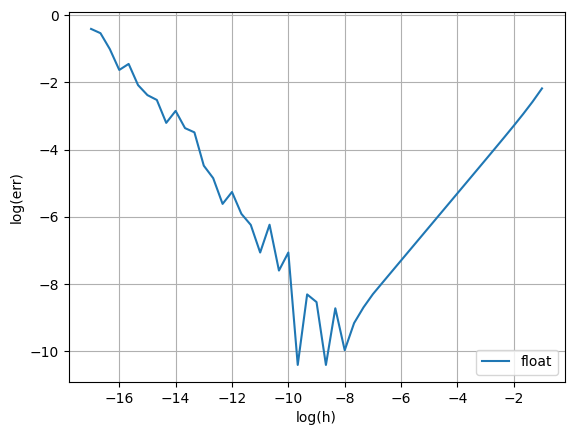

In [4]:
import math

x = 0.1
fcn = math.sin
fcn_prime = math.cos

err_math = []
h_log_math = []
err_log_math = []
for e in h_list:
    err_math.append(err(e, x, fcn, fcn_prime))
    err_log_math.append(math.log10(abs(err(e,x,fcn,fcn_prime))))
    h_log_math.append(math.log10(e))


plt.plot(h_log_math, err_log_math, label = "float")
plt.legend(loc = "lower right")
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.grid()
plt.show()

## numpy库

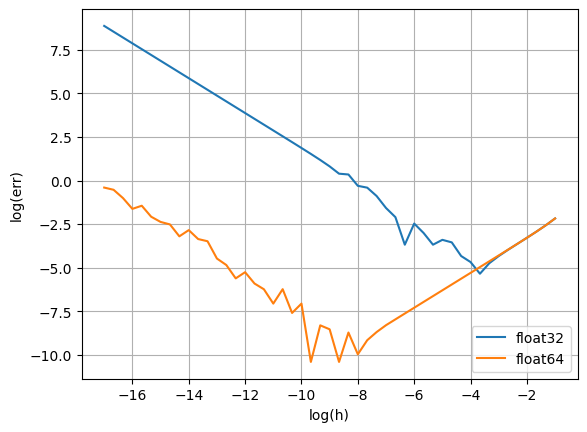

In [5]:
fcn0 = np.sin
fcn_prime0 = np.cos

h_32_numpy = np.logspace(-pow-1, -1, pow*3+1, dtype=np.float32)
err_32_numpy = err(h_32_numpy,x,fcn0,fcn_prime0)
h_32_log_numpy = np.log10(h_32_numpy)
err_32_log_numpy = np.log10(np.abs(err_32_numpy))

h_64_numpy = np.logspace(-pow-1, -1, pow*3+1, dtype=np.float64)
err_64_numpy = err(h_64_numpy,x,fcn0,fcn_prime0)
h_64_log_numpy = np.log10(h_64_numpy)
err_64_log_numpy = np.log10(np.abs(err_64_numpy))

plt.plot(h_32_log_numpy, err_32_log_numpy, label = "float32")
plt.plot(h_64_log_numpy, err_64_log_numpy, label = "float64")
plt.legend(loc = "lower right")
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.grid()
plt.show()


## torch库
-- <font color=white size=4 face=雅黑>torch指定了10余种不同的数据类型，其中CPU上的 float32 对应于`torch.float32`, float64 对应于`torch.double`</font> 


to see more: [https://pytorch.org/docs/stable/tensors.html](https://pytorch.org/docs/stable/tensors.html)

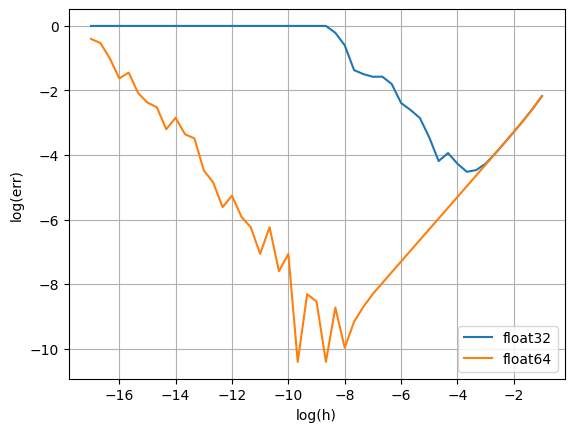

In [6]:
import torch
fcn1 = torch.sin
fcn_prime1 = torch.cos

x_32_torch = torch.tensor(x, dtype=torch.float32)
h_32_torch = torch.logspace(-pow-1, -1, pow*3+1, dtype=torch.float32)
err_32_torch = err(h_32_torch, x_32_torch, fcn1, fcn_prime1)
h_32_log_torch = torch.log10(h_32_torch)
err_32_log_torch = torch.log10(torch.abs(err_32_torch))

x_64_torch = torch.tensor(x, dtype=torch.double)
h_64_torch = torch.logspace(-pow-1, -1, pow*3+1, dtype=torch.double)
err_64_torch = err(h_64_torch,x_64_torch,fcn1,fcn_prime1)
h_64_log_torch = torch.log10(h_64_torch)
err_64_log_torch = torch.log10(torch.abs(err_64_torch))

plt.plot(h_32_log_torch, err_32_log_torch, label = "float32")
plt.plot(h_64_log_torch, err_64_log_torch, label = "float64")
plt.legend(loc = "lower right")
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.grid()
plt.show()


<font color=white size=4 face=雅黑>**注**：torch 结果同 jax</font> 

## jax 库

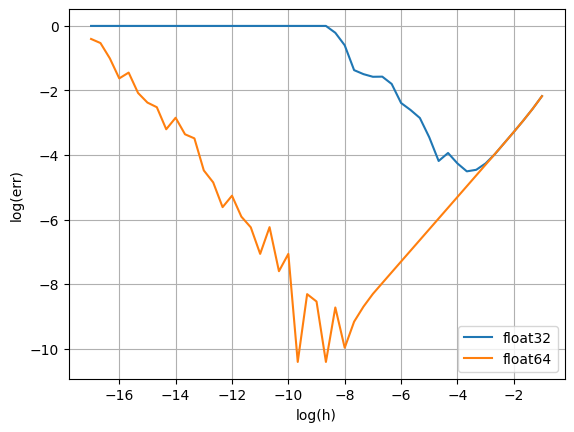

In [7]:
import jax.numpy as jnp
from jax.config import config

fcn2 = jnp.sin
fcn_prime2 = jnp.cos

config.update("jax_enable_x64",False)
h_32_jnp = jnp.logspace(-pow-1, -1, pow*3+1)
err_32_jnp = err(h_32_jnp,x,fcn2,fcn_prime2)
h_32_log_jnp = jnp.log10(h_32_jnp)
err_32_log_jnp = jnp.log10(jnp.abs(err_32_jnp))

config.update("jax_enable_x64",True)
h_64_jnp = jnp.logspace(-pow-1, -1, pow*3+1)
err_64_jnp = err(h_64_jnp,x,fcn2,fcn_prime2)
h_64_log_jnp = jnp.log10(h_64_jnp)
err_64_log_jnp = jnp.log10(jnp.abs(err_64_jnp))

plt.plot(h_32_log_jnp, err_32_log_jnp, label = "float32")
plt.plot(h_64_log_jnp, err_64_log_jnp, label = "float64")
plt.legend(loc = "lower right")
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.grid()
plt.show()

## 集中展示

ValueError: '.' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

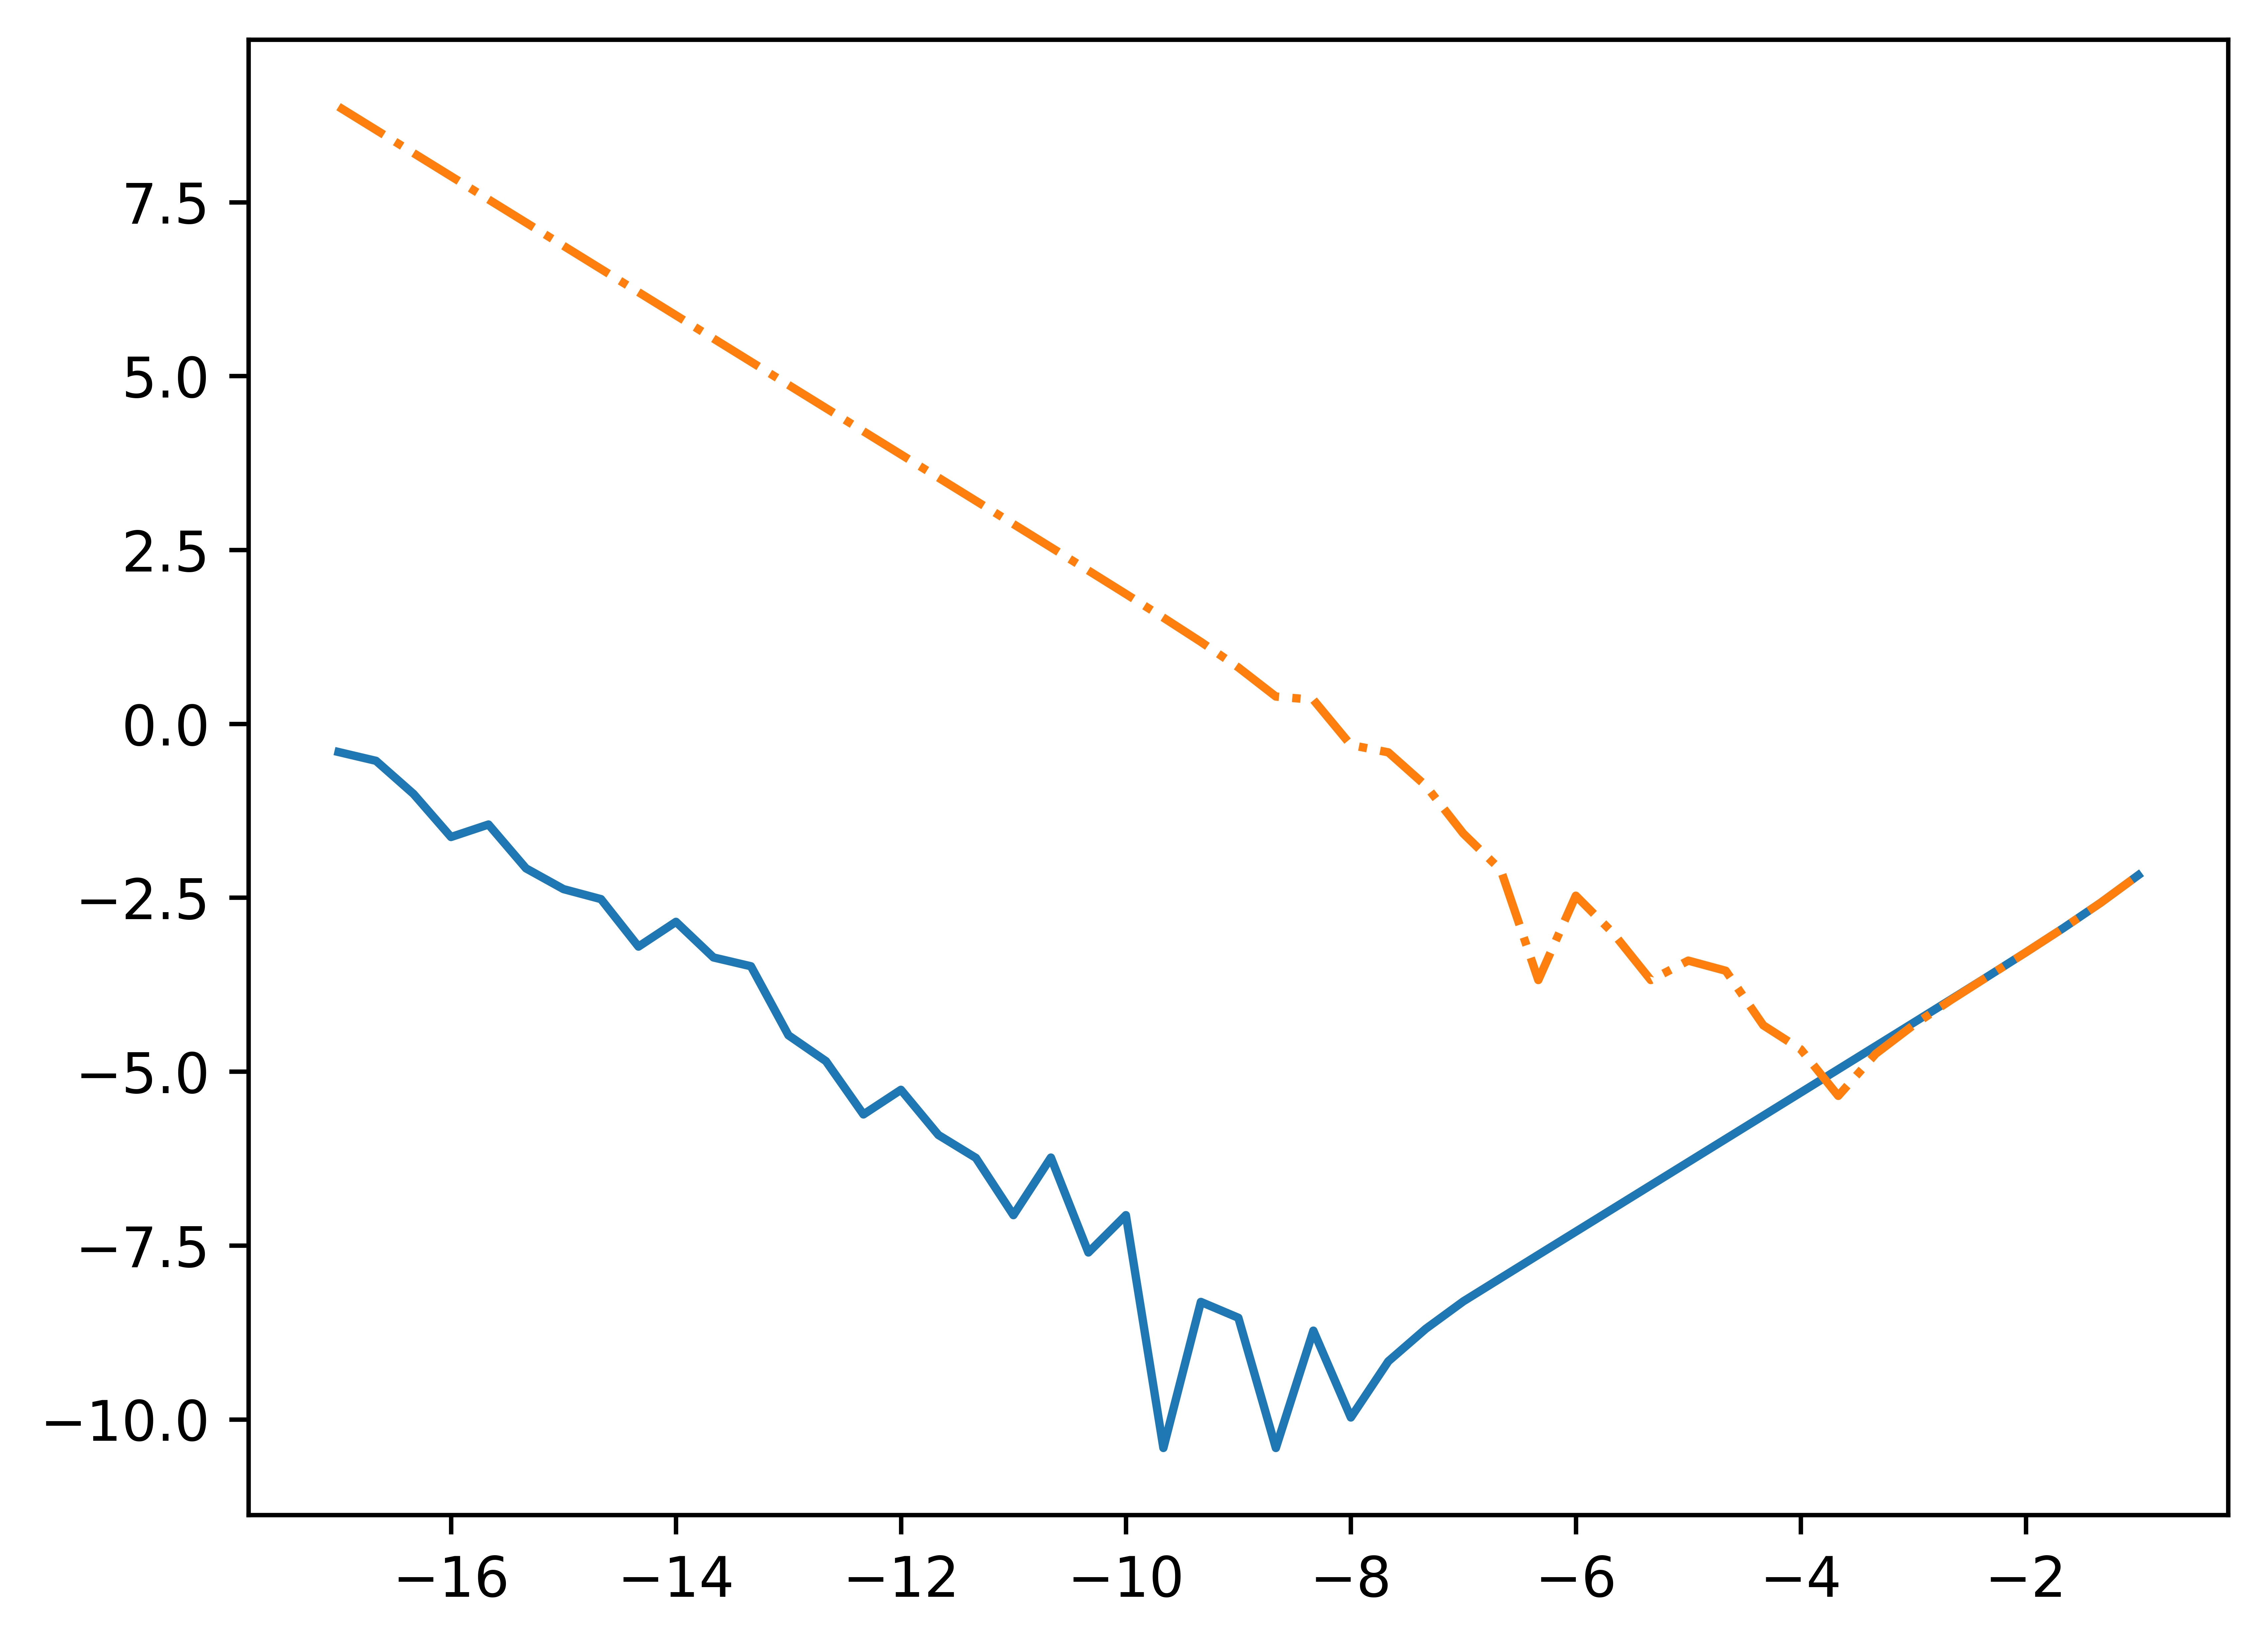

In [8]:
# plt.figure(dpi=1200)

plt.plot(h_log_math, err_log_math, label = "math float")
plt.plot(h_32_log_numpy, err_32_log_numpy, label = "NumPy float32", linestyle = "-.")
plt.plot(h_64_log_numpy, err_64_log_numpy, label = "NumPy float64", linestyle = ".")
plt.plot(h_32_log_jnp, err_32_log_jnp, label = "Jax float32", linstyle="--")
plt.scatter(h_64_log_jnp, err_64_log_jnp, s = 4, label = "Jax float64")

plt.legend(loc = "upper right")
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.grid()
# plt.savefig(r"/mnt/c/Users/lenovo/Desktop/fig1.3.png")
# plt.show()

# 1.3 数值微分的程序实现

## 如果假设方程的输入仅为1维

### 简单的实现

In [ ]:
from typing import Union, Tuple

def grad(fun: Callable, step_size=1E-5)-> Callable:
    def grad_f(x):
        return (fun(x + step_size) - fun(x)) / step_size
    return grad_f

def value_and_grad(fun: Callable, step_size=1E-5):
    def value_and_grad_f(x):
        value = fun(x)
        grad = (fun(x + step_size) - value) / step_size
        return value, grad
    return value_and_grad_f

### 规范的实现

In [ ]:
def value_and_grad(fun: Callable, step_size=1E-5
                   )-> Callable:
    '''
    构造一个方程，它能够同时计算函数 fun 的值和它的梯度
       fun: 被微分的函数。它的输入返回值需要为一个数（而非数组）；
       step_size: 数值微分所特有，用于描述微分之中所选取的步长；

    返回：
       一个和fun具有相同输入结构的函数，这个函数能够同时计算fun的值和它的导函数
    '''
    def value_and_grad_f(*arg):
        # 输入检查
        if len(arg) != 1:
            raise TypeError(f"函数仅允许有一个变量的输入, 但收到了{len(arg)}个")
        x = arg[0]

        # 计算函数的值和导函数
        value = fun(x)
        grad = (fun(x + step_size)-value) / step_size
        return value, grad
    # 将函数value_and_grad_f返回
    return value_and_grad_f

def grad(fun: Callable, step_size=1E-5)-> Callable:
    '''
    构造一个方程，它仅计算函数 fun 的导数
       fun: 被微分的函数。它的输入返回值需要为一个数（而非数组）；
       step_size: 数值微分所特有，用于描述微分之中所选取的步长；

    返回：
       一个和fun具有相同输入结构的函数，这个函数能够计算函数fun导函数
    '''
    value_and_grad_f = value_and_grad(fun, step_size)
    def grad_f(*arg):
        # 仅仅返回导数
        _, g = value_and_grad_f(*arg)
        return g
    # 将函数value_and_grad_f返回
    return grad_f

In [ ]:
import math
f = math.sin
df = grad(f)
ddf = grad(df)
dddf = grad(ddf)
print(df(0.))
print(ddf(0.))
print(dddf(0.))


In [ ]:
from jax import grad
import numpy as np
print(len(np.array([1.])))

## 如果假设方程的输入可以任意

In [ ]:
import numpy as np
from copy import deepcopy
from typing import Callable, Union, Sequence

def value_and_grad(fun: Callable, argnums: Union[int, Sequence[int]] = (0,),
                   has_aux: bool = False, step_size=1E-5,
                   )-> Callable:
    '''
    构造一个方程，它能够同时计算函数 fun 的值和它的梯度
        fun: 被微分的函数。需要被微分的位置由参数argnums指定，
            而它的输入的返回值需要为一个数（而非数组）；
        argnums: 可选参数，可以为整数int或者一个整数的序列, 用于指定微分的对象；
        has_aux: 可选参数，bool类型，用于显式的声明函数fun是否存在除整数以外的输出；
        step_size: 数值微分所特有，用于描述微分之中所选取的步长；

    返回：
       一个和fun具有相同输入结构的函数，这个函数能够同时计算fun的值和指定位置的导函数
    '''
    if isinstance(argnums, int): 
        argnums = (argnums,)

    def value_and_grad_f(*args):
        # 输入检查
        max_argnum = argnums if isinstance(argnums, int) else max(argnums)
        if max_argnum >= len(args):
            raise TypeError(f"对参数 argnums = {argnums}微分需要至少 "
                            f"{max_argnum+1}个位置的参数作为变量被传入，"
                            f"但只收到了{len(args)}个参数")

        # 构造求导所需的输入
        diff_arg_list = []
        for num in argnums:
            temp_args = deepcopy(list(args))
            temp_args[num] += step_size * np.ones_like(args[num], dtype=np.float64)
            diff_arg_list.append(temp_args)

        # 计算函数的值和导函数
        if not has_aux:
            value = fun(*args)
            g = [(fun(*diff_args)-value) / step_size for diff_args in diff_arg_list]
        else:
            value, aux = fun(*args)
            g = [(fun(*diff_args)[0]-value) / step_size for diff_args in diff_arg_list]
        
        # 程序输出
        g = g[0] if len(argnums)==1 else tuple(g)
        if not has_aux:
            return value, g
        else:
            return (value, aux), g

    # 将函数value_and_grad_f返回
    return value_and_grad_f

def grad(fun: Callable, argnums: Union[int, Sequence[int]] = (0,),
         has_aux: bool = False, step_size=1E-5,
         )-> Callable:
    '''
    构造一个方程，它仅计算函数 fun 的梯度
        fun: 被微分的函数。需要被微分的位置由参数argnums指定， 
            而函数fun返回的第一个值需要为一个数（而非数组），
            如果函数fun有另外的输出, 则需令has_aux参数为True；
        argnums: 可选参数，可以为整数int或者一个整数的序列, 用于指定微分的对象；
        has_aux: 可选参数，bool类型，用于显式的声明函数fun是否存在除整数以外的输出；
        step_size: 数值微分所特有，用于描述微分之中所选取的步长；

    返回：
       一个和fun具有相同输入结构的函数，这个函数能够计算函数fun的梯度
    '''
    value_and_grad_f = value_and_grad(fun=fun, argnums=argnums,
                                      has_aux=has_aux ,step_size=step_size)
    
    def grad_f(*arg):
        # 仅仅返回导数
        _, g = value_and_grad_f(*arg)
        return g

    def grad_f_aux(*arg):
        # 返回导数，以及原函数输出的其他参数
        (_, aux), g = value_and_grad_f(*arg)
        return g, aux
    return grad_f_aux if has_aux else grad_f

In [ ]:
def f(x,y):
    aux = "function called"
    return np.sin(x+2*y), aux

x = np.array([0.,0.,np.pi])
y = np.array([0.,np.pi,0.])
df1  = grad(f, argnums=0,      step_size=1E-5, has_aux=True)
df2  = grad(f, argnums=1,      step_size=1E-5, has_aux=True)
df12 = grad(f, argnums=(0,1),  step_size=1E-5, has_aux=True)

print(f(x,y))
print(df1 (x,y))
print(df2 (x,y))
print(df12(x,y))

'''
程序输出:
>>   (array([ 0.0000000e+00, -2.4492936e-16,  1.2246468e-16]), 'function called')
>>   (array([ 1.,  1., -1.]), 'function called')
>>   (array([ 2.,  2., -2.]), 'function called')
>>  ((array([ 1.,  1., -1.]), array([ 2.,  2., -2.])), 'function called')
'''





$$
\begin{aligned}
I(\alpha, \boldsymbol{r} ; 0,0,0) &=\iiint \frac{1}{|\boldsymbol{x}|} e^{-\alpha|\boldsymbol{x}-\boldsymbol{r}|^{2}} d^{3} \boldsymbol{x} \\
&=\left(\frac{\pi}{\alpha}\right)^{3 / 2} \frac{\operatorname{erf}(\sqrt{\alpha} r)}{r} \exp \left(-\frac{1}{4} \alpha r^{2}\right)
\end{aligned}
$$

# 1.4 pytree

In [ ]:
tree1 = [1, "a", object()]  # 3 leaves
tree2 = (1, (2, 3), ())  # 3 leaves
tree3 = [1, {"k1": 2, "k2": (3, 4)}, 5]  # 5 leaves

In [ ]:
from jax.tree_util import tree_structure
print(tree_structure(tree1))
print(tree_structure(tree2))
print(tree_structure(tree3))

PyTreeDef([*, *, *])
PyTreeDef((*, (*, *), ()))
PyTreeDef([*, {'k1': *, 'k2': (*, *)}, *])


In [ ]:
from jax.tree_util import tree_flatten, tree_unflatten
import jax.numpy as jnp

# The structured value to be transformed
value_structured = [1., (2., 3.)]

# The leaves in value_flat correspond to the `*` markers in value_tree
value_flat, value_tree = tree_flatten(value_structured)
print("value_flat={}\nvalue_tree={}".format(value_flat, value_tree))

# Transform the flat value list using an element-wise numeric transformer
transformed_flat = list(map(lambda v: v * 2., value_flat))
print("transformed_flat={}".format(transformed_flat))

# Reconstruct the structured output, using the original
transformed_structured = tree_unflatten(value_tree, transformed_flat)
print("transformed_structured={}".format(transformed_structured))

value_flat=[1.0, 2.0, 3.0]
value_tree=PyTreeDef([*, (*, *)])
transformed_flat=[2.0, 4.0, 6.0]
transformed_structured=[2.0, (4.0, 6.0)]


In [ ]:
from collections import namedtuple
Point = namedtuple('Point', ['x', 'y'])

example_containers = [
    (1., [2., 3.]),
    (1., {'b': 2., 'a': 3.}),
    1.,
    None,
    jnp.zeros(2),
    Point(1., 2.)
]
def show_example(structured):
  flat, tree = tree_flatten(structured)
  unflattened = tree_unflatten(tree, flat)
  print("structured={}\n  flat={}\n  tree={}\n  unflattened={}".format(
      structured, flat, tree, unflattened))

for structured in example_containers:
  show_example(structured)

structured=(1.0, [2.0, 3.0])
  flat=[1.0, 2.0, 3.0]
  tree=PyTreeDef((*, [*, *]))
  unflattened=(1.0, [2.0, 3.0])
structured=(1.0, {'b': 2.0, 'a': 3.0})
  flat=[1.0, 3.0, 2.0]
  tree=PyTreeDef((*, {'a': *, 'b': *}))
  unflattened=(1.0, {'a': 3.0, 'b': 2.0})
structured=1.0
  flat=[1.0]
  tree=PyTreeDef(*)
  unflattened=1.0
structured=None
  flat=[]
  tree=PyTreeDef(None)
  unflattened=None
structured=[0. 0.]
  flat=[DeviceArray([0., 0.], dtype=float32)]
  tree=PyTreeDef(*)
  unflattened=[0. 0.]
structured=Point(x=1.0, y=2.0)
  flat=[1.0, 2.0]
  tree=PyTreeDef(CustomNode(namedtuple[<class '__main__.Point'>], [*, *]))
  unflattened=Point(x=1.0, y=2.0)


In [ ]:
class Special(object):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __repr__(self):
    return "Special(x={}, y={})".format(self.x, self.y)


show_example(Special(1., 2.))

structured=Special(x=1.0, y=2.0)
  flat=[Special(x=1.0, y=2.0)]
  tree=PyTreeDef(*)
  unflattened=Special(x=1.0, y=2.0)


In [ ]:
from jax.tree_util import register_pytree_node

class RegisteredSpecial(Special):
  def __repr__(self):
    return "RegisteredSpecial(x={}, y={})".format(self.x, self.y)

def special_flatten(v):
  """Specifies a flattening recipe.

  Params:
    v: the value of registered type to flatten.
  Returns:
    a pair of an iterable with the children to be flattened recursively,
    and some opaque auxiliary data to pass back to the unflattening recipe.
    The auxiliary data is stored in the treedef for use during unflattening.
    The auxiliary data could be used, e.g., for dictionary keys.
  """
  children = (v.x, v.y)
  aux_data = None
  return (children, aux_data)

def special_unflatten(aux_data, children):
  """Specifies an unflattening recipe.

  Params:
    aux_data: the opaque data that was specified during flattening of the
      current treedef.
    children: the unflattened children

  Returns:
    a re-constructed object of the registered type, using the specified
    children and auxiliary data.
  """
  return RegisteredSpecial(*children)

# Global registration
register_pytree_node(
    RegisteredSpecial,
    special_flatten,    # tell JAX what are the children nodes
    special_unflatten   # tell JAX how to pack back into a RegisteredSpecial
)

show_example(RegisteredSpecial(1., 2.))

In [ ]:
from jax.tree_util import register_pytree_node_class

@register_pytree_node_class
class RegisteredSpecial2(Special):
    def __repr__(self):
        return "RegisteredSpecial2(x={}, y={})".format(self.x, self.y)

    def tree_flatten(self):
        children = (self.x, self.y)
        aux_data = None
        return (children, aux_data)

    @classmethod
    def tree_unflatten(cls, aux_data, children):
        return cls(*children)

show_example(RegisteredSpecial2(1., 2.))

structured=RegisteredSpecial2(x=1.0, y=2.0)
  flat=[1.0, 2.0]
  tree=PyTreeDef(CustomNode(<class '__main__.RegisteredSpecial2'>[None], [*, *]))
  unflattened=RegisteredSpecial2(x=1.0, y=2.0)
